# S-COMP004 Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the S-COMP004 product created by TU Wien. This product is a summer composite (VV of June (R), VH of July (G), VV/VH of August (B)). Input data are MMENSIG0.

The product name in the ACube is `SCOMP004_Sentinel_1`. It is composed of three measurements `band_1` `band_2` and `band_3`.

Relevant links:
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.4.%20data%20processing%20levels/3.4.3.%20Sentinel-1%20products/
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.1.%20Sentinel-1%20data/3.4.1.3.%20Products/3.4.1.3.4.%20Seasonal%20RGB%20Composite/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has three measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_scomp004')
product = 'SCOMP004_Sentinel_1'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,platform,product_type,format,instrument,crs,resolution,spatial_dimensions
id,,,,,,,,,
17,SCOMP004_Sentinel_1,"Summer composite (VV of June (R), VH of July (...",Sentinel-1,TUW_S-COMP004_S1,GeoTIFF,SAR,"PROJCS[""Azimuthal_Equidistant"",GEOGCS[""GCS_WGS...","[-10, 10]","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

aliases  dtype    name  \
product             measurement                                                 
SCOMP004_Sentinel_1 band_1       [band_01, B01, Band1, Band_1]  int16  band_1   
                    band_2       [band_02, B02, Band2, Band_2]  int16  band_2   
                    band_3       [band_03, B03, Band3, Band_3]  int16  band_3   

                                 nodata units  
product             measurement                
SCOMP004_Sentinel_1 band_1          255    dB  
                    band_2          255    dB  
                    band_3          255    dB

In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2018-02-01', '2019-05-02')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['creation_dt', 'csw_link', 'extent', 'format', 'granule_id', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'orbit', 'platform', 'product_format', 'product_type']
****************************************************************************************************
METADATA
{'creation_dt': '2019-10-30T22:20:40.098811',
 'csw_link': 'https://csw-acube.eodc.eu//?service=CSW&version=3.0.0&request=GetRecordById&id=S-COMP004_SGRTC05_S1-_IWGRDH1---_20180601_20180830_EU010M_E052N016T1&elementSetName=full&outputSchema=http://www.isotc211.org/2005/gmd&outputformat=application/xml',
 'extent': {'center_dt': '2018-07-16T00:00:00',
            'coord': {'ll': {'lat': 47.97836637131795,
                             'lon': 15.455732336236059},
                      'lr': {'lat': 48.07479777972179,
                             'lon': 16.787238513505876},
             

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 1526, y: 2250)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-16
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x        (x) float64 5.963e+05 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
Data variables:
    band_1   (time, y, x) int16 213 193 192 206 203 194 ... 254 254 254 254 254
    band_2   (time, y, x) int16 183 194 198 193 195 197 ... 254 254 254 254 254
    band_3   (time, y, x) int16 110 111 167 144 123 133 ... 251 254 241 239 254
Attributes:
    crs:      EPSG:32633

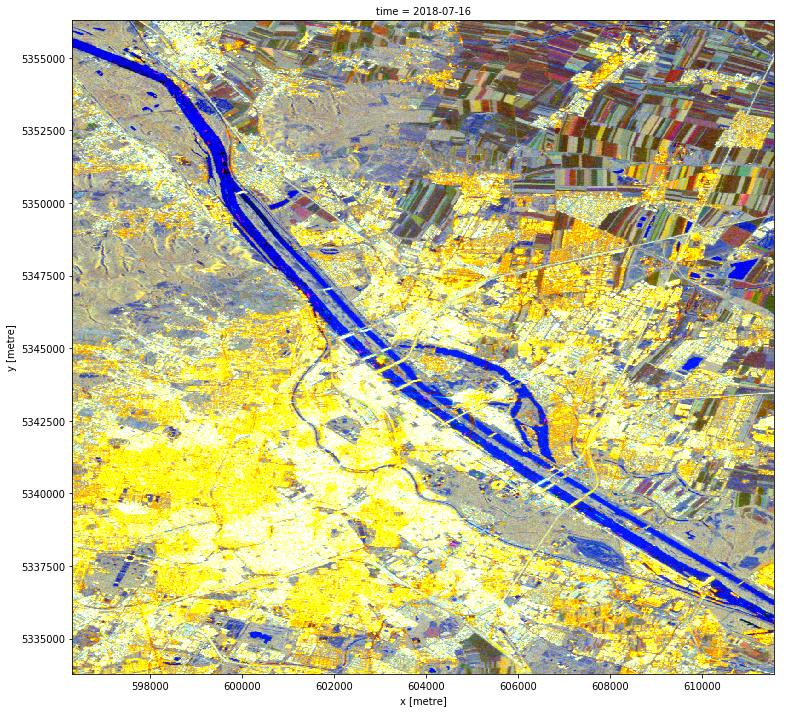

In [7]:
data_plot = data.to_array(dim='color')
data_plot.plot.imshow(
    x=data.crs.dimensions[1], 
    y=data.crs.dimensions[0],
    col='time',
    size=10,
    col_wrap=2
)